# 1.7	Python科学计算包—SciPy

## SciPy简介
SciPy是一种以NumPy为基础，用于数学、工程及许多其他的科学任务的科学计算包，其使用的基本数据结构是由NumPy模块提供的多维数组，因此Numpy和SciPy协同使用可以更加高效地解决问题。SciPy很适合用于十分依赖数学和数值运算的问题，其内部的模块包括优化模块、线性代数模块、统计模块、傅里叶变化模块、积分模块、信号处理模块、图像处理模块、稀疏矩阵模块、插值模块等。

SciPy中本专业比较重要且常用的有优化、线性代数、统计这三个模块：

* 拟合与优化模块（scipy.optimize）： scipy.optimize提供了很多数值优化算法，包括多元标量函数的无约束极小化、多元标量函数的有约束极小化、全局优化、最小二乘法、单变量函数求解、求根、线性规划、指派问题等问题的求解。


* 线性代数模块（scipy.linalg）：利用scipy.linalg可以计算行列式det()、求解线性方程组linalg.solve()、求特征值-特征向量linalg.eig()、奇异值分解linalg.svd()等；与numpy.linalg相比，scipy.linalg除了包含numpy.linalg中的所有函数，还包含了numpy.linalg没有的高级功能。


* 统计模块（scipy.stats）：scipy.stats包含了大量统计以及概率分析工具。scipy.stats对离散统计分布和连续统计分布均可有效处理，内部函数包括离散统计分布的概率质量函数（Probability Mass Function，PMF）、累积分布函数（Cumulative Distribution Function，CDF），连续统计分布的概率密度函数（Porbability Density Function，PDF）、累积分布函数等各类方法，以及计算其中位数、百分位数、平均值，统计检验等。

接下来笔者将结合例子着重介绍优化、线性代数、统计这三个模块的使用方法。

## 1.7.2	拟合与优化模块
### （1）求最小值

In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

假定有函数f(x)，并希望求得其最小值，首先在Python中定义该函数，并借助借助NumPy中的三角函数可以实现函数的定义，并绘制函数图像：
f(x)=x^4/100+20sin⁡(x)

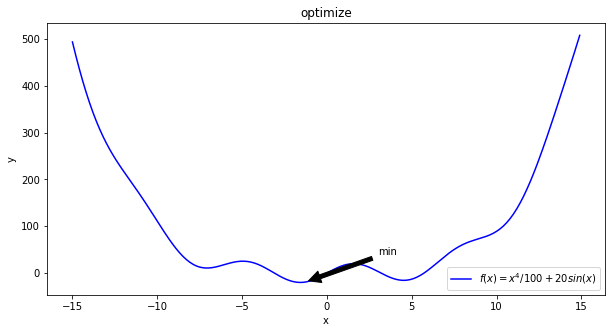

In [7]:
def f(x):
    return 0.01 * x**4 + 20 * np.sin(x)

#绘制目标函数的图形
plt.figure(figsize=(10, 5))
x = np.arange(-15, 15, 0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('optimize')
plt.plot(x, f(x), 'b-', label='$f(x)=x^4/100+20sin(x)$')
#图像中的最低点函数值
a = f(-1.3)
plt.annotate('min', xy=(-1.3, a), xytext=(3, 40), arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend()
plt.show()

从图中分析可知，最小值点应在0点左侧。接着，使用optimize模块求出最小值及最小值点。求解该类问题最小值的方法一般是从初始点开始使用梯度下降法求解，因此模型输入中需要指定要求解的函数以及初始点，在optimize模块中可以使用bfgs算法（牛顿算法），代码及返回结果如下：

In [4]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -19.939711
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.56315723])

可以看到，通过四次迭代求出了当前最小值为-19.939711，最小值点为x=-1.56315723，但有可能该值并不是全局最小值，而是局部最小值，这也是bfgs算法存在缺陷。为了验证这一解是全局最优解，可以通过设置随机的初始点，获取全局最小值（设置得越多，时间成本越高）此处使用暴力求解算法Brute-force：

In [5]:
tmp = (-15,15,0.1)
global_minX = optimize.brute(f,(tmp,))
print(global_minX)

[-1.563125]


通过设置随机的初始点进行求解，得到的最小值点的横坐标为x=-1.563125，回忆图 1 7的最小值点的横坐标为x=-1.56315723，二者不等，故其并非全局最优解对应的点。

### （2）曲线拟合
本节将通过最小二乘法拟合余弦函数。首先定义拟合函数图形以及误差函数，用于拟合的函数图形定义为下式，其中a、K、b为参数，整个拟合过程代码如下：	f(x)=a*sin⁡(2*K*π+b)

依据生成的样本点，用上式定义的函数图像进行拟合，可以得到拟合函数曲线的三个参数对应的值：a= 20.07，K= 0.499，b= 0.786，将结果可视化，如图所示。

In [7]:
#定义拟合函数图形
def func(x,m):
    a,K,b = m
    return a*np.sin(2*K*np.pi*x+b)
 
#定义误差函数
def error(m,x,y):
    return y-func(x,m)

In [11]:
#生成训练数据
#给出参数的初始值
p = [20,0.5,np.pi/4]
a,K,b = p
x = np.linspace(0,2*np.pi,1000) # 划定x范围 0-2pai

#随机指定参数 
y = func(x,[a,K,b])
#randn(m)从标准正态分布中返回m个值，在本例作为噪声
y_ = y + 2*np.random.randn(len(x))
 
#进行参数估计
Para = optimize.leastsq(error,p,args=(x,y_))
a,K,b = Para[0]
print('a=',a, 'K=',K,'b=',b)

a= 19.932547570918246 K= 0.49985892468432763 b= 0.7906490645125348


In [16]:
# 图形可视化
plt.figure(figsize=(20, 8))
ax1 = plt.subplot()
plt.sca(ax1)
# 绘制散点图
plt.scatter(x, y_, color='gray', label='Sample Points', linewidth=3)
plt.xlabel('x')
plt.xlabel('y')
y = func(x, p)
plt.plot(x, y, color='red', label='Target line', linewidth=2)
# 显示图例和图形
plt.legend()
plt.show()

至此读者可大致了解如何使用optimize模块实现求解最小值和曲线拟合。Optimize模块仍有大量其他优化函数，读者可以此为案例掌握SciPy中优化模块的用法，并探索其他优化函数的使用方法。

## 1.7.3	线性代数模块
本节将结合例子了解学习对于矩阵的一些操作。首先导入需要的模块并创建一个矩阵，可通过以下代码获取matrix的行列式和逆矩阵。此部分与NumPy使用方法类似，不再赘述。

In [17]:
from scipy import linalg

In [18]:
matrix = np.array([[9,2,8],[2,5,6],[5,1,3]])

In [19]:
det = linalg.det(matrix)
print(det)
inv = linalg.inv(matrix)
print(inv)

-54.99999999999999
[[-0.16363636 -0.03636364  0.50909091]
 [-0.43636364  0.23636364  0.69090909]
 [ 0.41818182 -0.01818182 -0.74545455]]


## 1.7.4 统计模块
本节将结合例子学习如何使用SciPy实现直方图和概率密度函数以及统计检验。首先导入需要的模块：

### （1）	直方图和概率密度函数
可以通过stats.norm实现正态分布，正态分布的概率密度函数标准形式如下式，调用其中的stats.norm.pdf(x,loc,scale)实现正态分布，并将其可视化，可以看到生成了3个不同均值和方差的正态分布：	f(x)=  e^(-x^2/2)/√2π

In [20]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
x = np.linspace(-10, 10, num=40)

gauss1 = stats.norm(loc=0, scale=2)  # loc: mean 均值， scale: standard deviation 标准差
gauss2 = stats.norm(loc=1, scale=3)
gauss3 = stats.norm(loc=-4, scale=2.5)

y1 = gauss1.pdf(x)
y2 = gauss2.pdf(x)
y3 = gauss3.pdf(x)
plt.plot(x, y1, color='orange', label='u=0,sigma=2')
plt.plot(x, y2, color='green', label='u=1,sigma=3')
plt.plot(x, y3, color='purple', label='u=-4,sigma=2.5')
plt.legend(loc='upper right')

### （2）	统计检验
生成两组观测值，假设他们都来自于高斯过程，我们可以用T检验来判断这两组观察值是否显著不同：

In [21]:
a = np.random.normal(1, 2, size=1000)
b = np.random.normal(2, 2, size=10)
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-2.170600295375276, pvalue=0.030194247734412462)

返回值：statistic=-1.94，pvalue=0.05，其中第一部分为T统计值，符号与两个随机过程的差异成比例，大小与差异的程度相关；第二个为p值，表示两个过程相同的概率。
至此，我们已经了解了SciPy中的三个模块里的一些功能，这都是SciPy的冰山一角，SciPy中还包含了许多实用高效的功能，待读者去一探究竟。